# Libraries

In [1]:
import numpy as np # linear algebra and numericals
import pandas as pd # dataset manipulation
pd.set_option('display.max_columns', None)
from tqdm.notebook import tqdm

# Visualization tools
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# modeling library
import sklearn

In [2]:
print('Numpy version: ', np.__version__)
print('Pandas version: ', pd.__version__)
print('Matplotlib version: ', matplotlib.__version__)
print('Seaborn version: ', sns.__version__)
print('Sklearn version: ', sklearn.__version__)

Numpy version:  1.22.4
Pandas version:  1.3.5
Matplotlib version:  3.5.3
Seaborn version:  0.11.2
Sklearn version:  1.2.1


# Import Dataset

In [3]:
df = pd.read_csv("https://rakamin-lms.s3.ap-southeast-1.amazonaws.com/vix-assets/idx-partners/loan_data_2007_2014.csv", low_memory=False)

# overview
df.sample(5)

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
11185,11185,819856,1028016,2000,2000,2000.0,36 months,16.89,71.20,D,D4,Loreal USA,10+ years,RENT,40800.0,Not Verified,Jul-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Legal fees,721xx,AR,11.91,1.0,Jan-95,3.0,9.0,NaN,3.0,0.0,747,24.9,7.0,f,0.0,0.0,2563.01000,2563.01,2000.0,563.01,0.0,0.0,0.0,Aug-14,71.01,NaN,Jul-14,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
152125,152125,4064615,5196776,10000,10000,10000.0,36 months,13.11,337.47,B,B4,United Nations Federal Credit Union,5 years,RENT,45000.0,Verified,Apr-13,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 03/28/13 > This loan will ...,credit_card,Credit Consolidation,113xx,NY,33.25,0.0,Feb-00,0.0,NaN,NaN,8.0,0.0,8997,73.7,11.0,f,0.0,0.0,11437.08260,11437.08,10000.0,1437.08,0.0,0.0,0.0,Feb-15,701.41,NaN,Feb-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,45140.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12200.0,NaN,NaN,NaN
316,316,1059462,1291082,4200,4200,4200.0,36 months,6.03,127.83,A,A1,Fisher Scientific,3 years,RENT,61000.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Trip Loan,070xx,NJ,8.92,0.0,Oct-03,0.0,NaN,NaN,7.0,0.0,4228,12.9,16.0,f,0.0,0.0,4601.62011,4601.62,4200.0,401.62,0.0,0.0,0.0,Dec-14,129.65,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
425096,425096,12956398,14988591,8000,8000,8000.0,36 months,14.16,274.05,C,C2,Slot Supervisor,10+ years,MORTGAGE,48000.0,Source Verified,Mar-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,488xx,MI,25.53,0.0,Dec-02,0.0,34.0,109.0,7.0,1.0,6551,87.3,32.0,f,0.0,0.0,8964.02000,8964.02,8000.0,964.02,0.0,0.0,0.0,Feb-15,6223.52,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,113769.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7500.0,NaN,NaN,NaN
337753,337753,21570989,23883881,10000,10000,10000.0,36 months,14.49,344.17,C,C4,social work,5 years,RENT,56000.0,Not Verified,Jul-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,329xx,FL,14.87,0.0,Oct-92,1.0,47.0,116.0,9.0,1.0,10245,39.4,17.0,w,0.0,0.0,10120.75000,10120.75,10000.0,120.75,0.0,0.0,0.0,Aug-14,10120.75,NaN,Sep-14,0.0,48.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,67853.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26000.0,NaN,NaN,NaN


# Exploratory Data Analysis (EDA)

## Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

1. The dataset consists of 466,285 rows and 75 columns
2. Some fields need a data type modification (term, emp_length, etc)
3. 17 fields are null fields (annual_inc_joint, dti_jont, etc)

## Missing Values

In [5]:
field_with_missing = [x for x in df.columns if df[x].isnull().sum() > 0]

for i in field_with_missing:
  missing_pct = np.round(df[i].isnull().sum()*100/len(df), 4)
  print(f'{i} : {missing_pct}% missing values')

emp_title : 5.9166% missing values
emp_length : 4.5054% missing values
annual_inc : 0.0009% missing values
desc : 72.9815% missing values
title : 0.0043% missing values
delinq_2yrs : 0.0062% missing values
earliest_cr_line : 0.0062% missing values
inq_last_6mths : 0.0062% missing values
mths_since_last_delinq : 53.6906% missing values
mths_since_last_record : 86.5666% missing values
open_acc : 0.0062% missing values
pub_rec : 0.0062% missing values
revol_util : 0.0729% missing values
total_acc : 0.0062% missing values
last_pymnt_d : 0.0806% missing values
next_pymnt_d : 48.7286% missing values
last_credit_pull_d : 0.009% missing values
collections_12_mths_ex_med : 0.0311% missing values
mths_since_last_major_derog : 78.7739% missing values
annual_inc_joint : 100.0% missing values
dti_joint : 100.0% missing values
verification_status_joint : 100.0% missing values
acc_now_delinq : 0.0062% missing values
tot_coll_amt : 15.0715% missing values
tot_cur_bal : 15.0715% missing values
open_acc

consider to drop fields with more than 50% missing values

## Duplicated Records

In [6]:
df.drop(columns = ['Unnamed: 0', 'id', 'member_id']).duplicated().sum()

0

There is no duplicated record

## Descriptive Statistics

In [7]:
# organize fields by data type
identifier = ['Unnamed: 0', 'id', 'member_id']
full_na = [x for x in df.columns if (df[x].isnull().sum()/len(df)) == 1]
encoded = ['policy_code']
categorical = [x for x in df.columns if df[x].dtypes == 'O' if x not in full_na]
numerical = [x for x in df.columns if x not in encoded+categorical+full_na+identifier]

### Numerical

In [8]:
df[numerical].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466256.000000,3.960090e+05,3.960090e+05,3.960090e+05
mean,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,0.004002,1.919135e+02,1.388017e+05,3.037909e+04
std,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.068637,1.463021e+04,1.521147e+05,3.724713e+04
min,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,0.000000,0.000000e+00,2.861800e+04,1.350000e+04
50%,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,0.000000,0.000000e+00,8.153900e+04,2.280000e+04
75%,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,0.000000,0.000000e+00,2.089530e+05,3.790000e+04
max,35000.000000,35000.000000,35000.000000,26.060000,1409.990000,7.500000e+06,39.990000,29.000000,33.000000,188.000000,129.000000,84.000000,63.000000,2.568995e+06,892.300000,156.000000,32160.380000,32160.380000,57777.579870,57777.580000,35000.030000,24205.620000,358.680000,33520.270000,7002.190000,36234.440000,20.000000,188.000000,5.000000,9.152545e+06,8.000078e+06,9.999999e+06


Some fields have a significantly different mean-median, indicates outliers or skewed distribution

### Categorical

In [9]:
df[categorical].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125983,466285,466265,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124436,14,63099,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [10]:
df[encoded].value_counts()

policy_code
1              466285
dtype: int64

1. Some categorical fields have many unique values
2. Some other categorical fields have only 1 unique

## Univariate Analysis

### Numerical

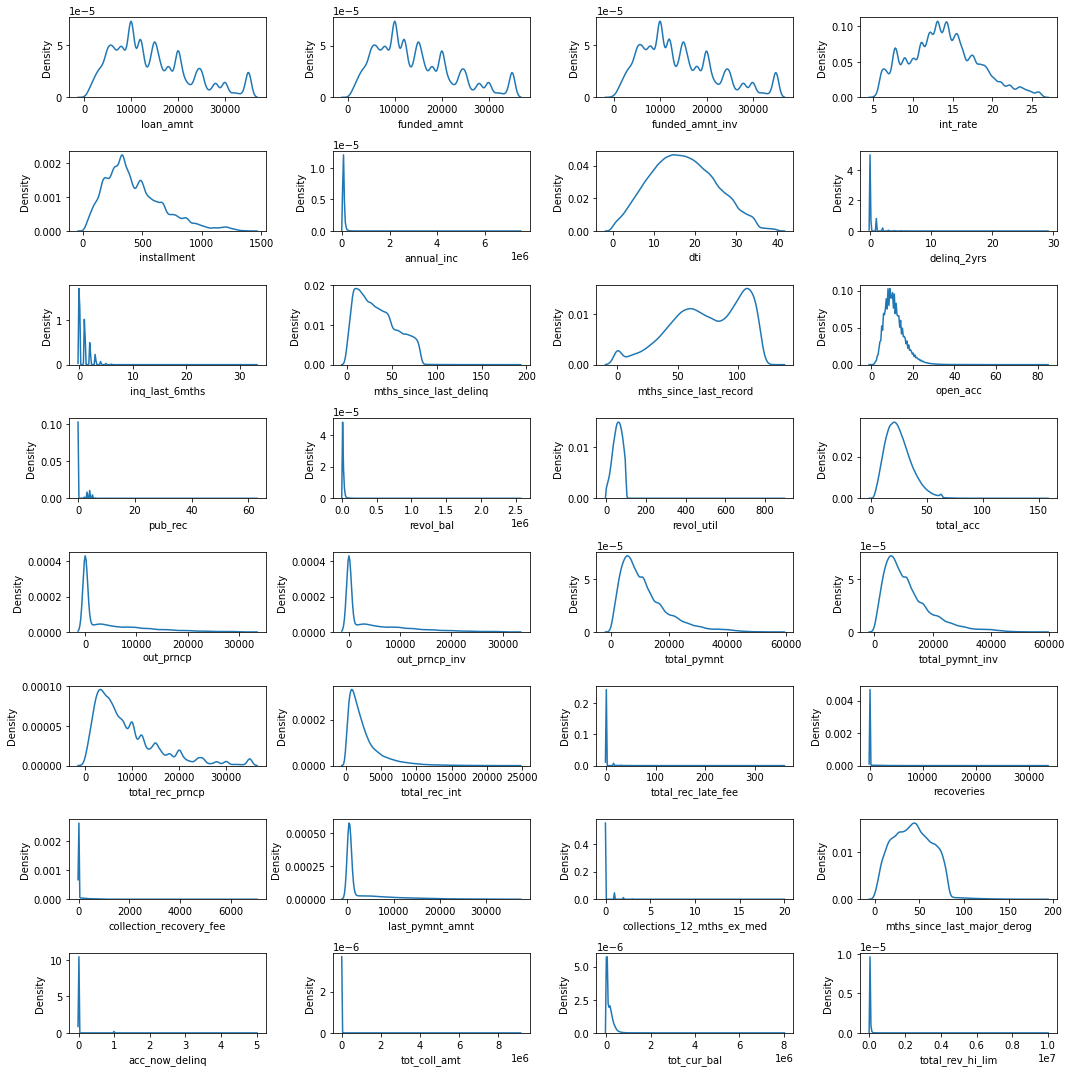

In [11]:
# KDE Plot

plt.figure(figsize = (15, 15))
for i in range(len(numerical)):
  plt.subplot(8, 4, i + 1)
  sns.kdeplot(data = df, x = numerical[i])

plt.tight_layout()
plt.show()

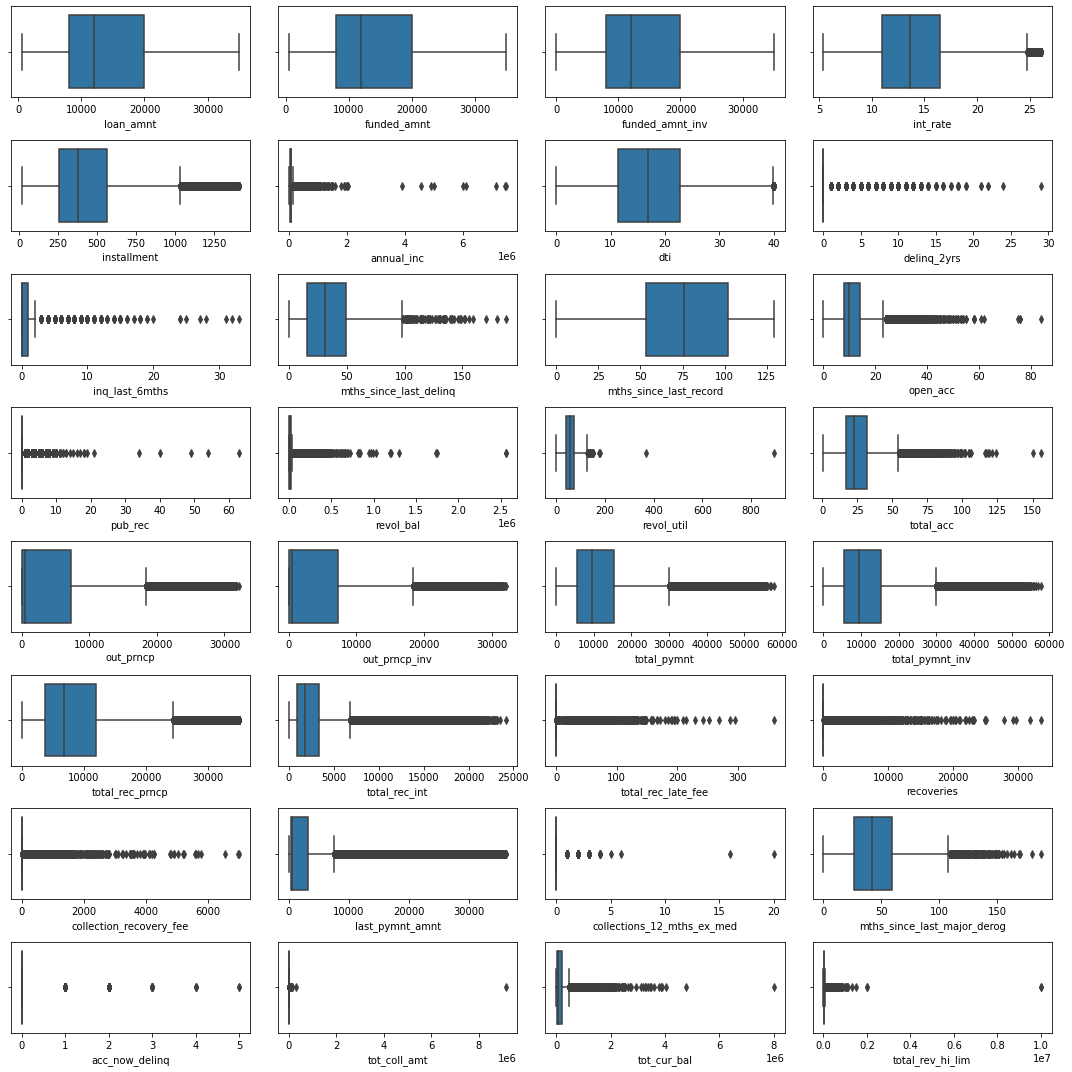

In [12]:
# Box Plot

plt.figure(figsize = (15, 15))
for i in range(len(numerical)):
  plt.subplot(8, 4, i + 1)
  sns.boxplot(data = df, x = numerical[i])

plt.tight_layout()
plt.show()

Many numerical fields contain outliers or not normally distributed. consider to :

1. Drop or replace oulier
2. Transform to normalize
3. Use non linear model

### Categorical

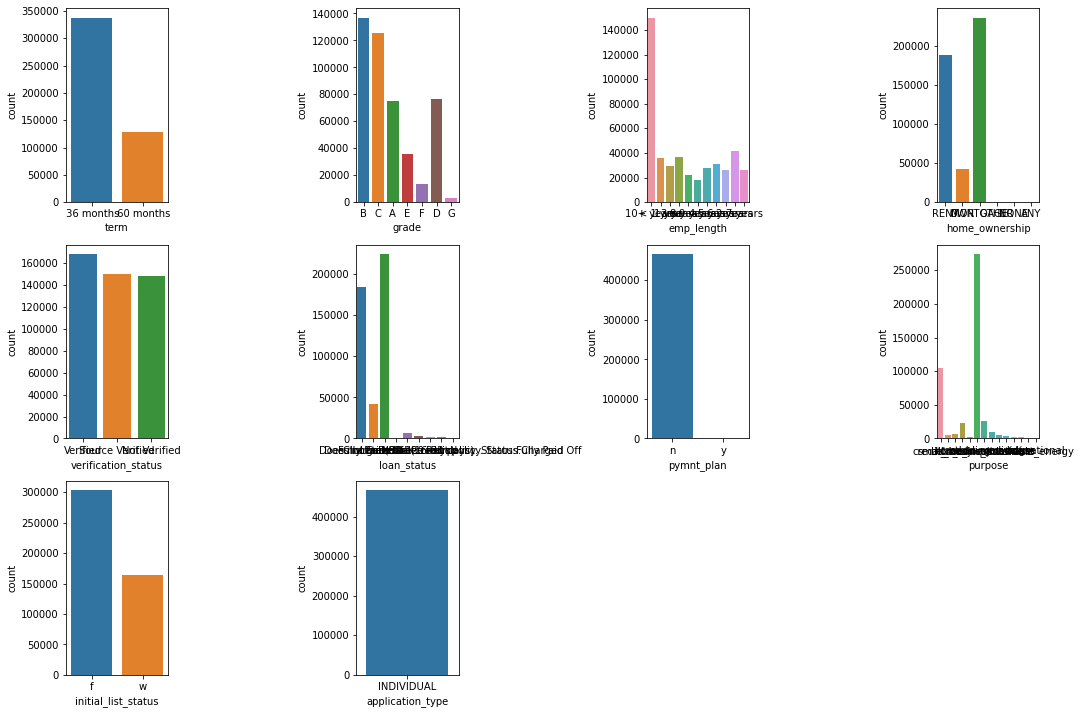

In [13]:
# Count plot

cat_to_plot = [x for x in categorical if df[x].nunique() <= 20]

plt.figure(figsize = (15, 10))
for i in range(len(cat_to_plot)):
  plt.subplot(3, 4, i+1)
  sns.countplot(data = df, x = cat_to_plot[i])

plt.tight_layout()
plt.show()

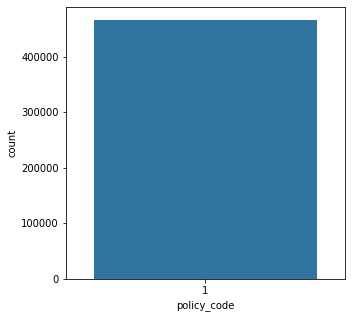

In [14]:
plt.figure(figsize = (5,5))
sns.countplot(data = df, x = 'policy_code')
plt.show()

Some categorical fields dominated by only 1 unique value

## Bivariate Analysis

### Numerical

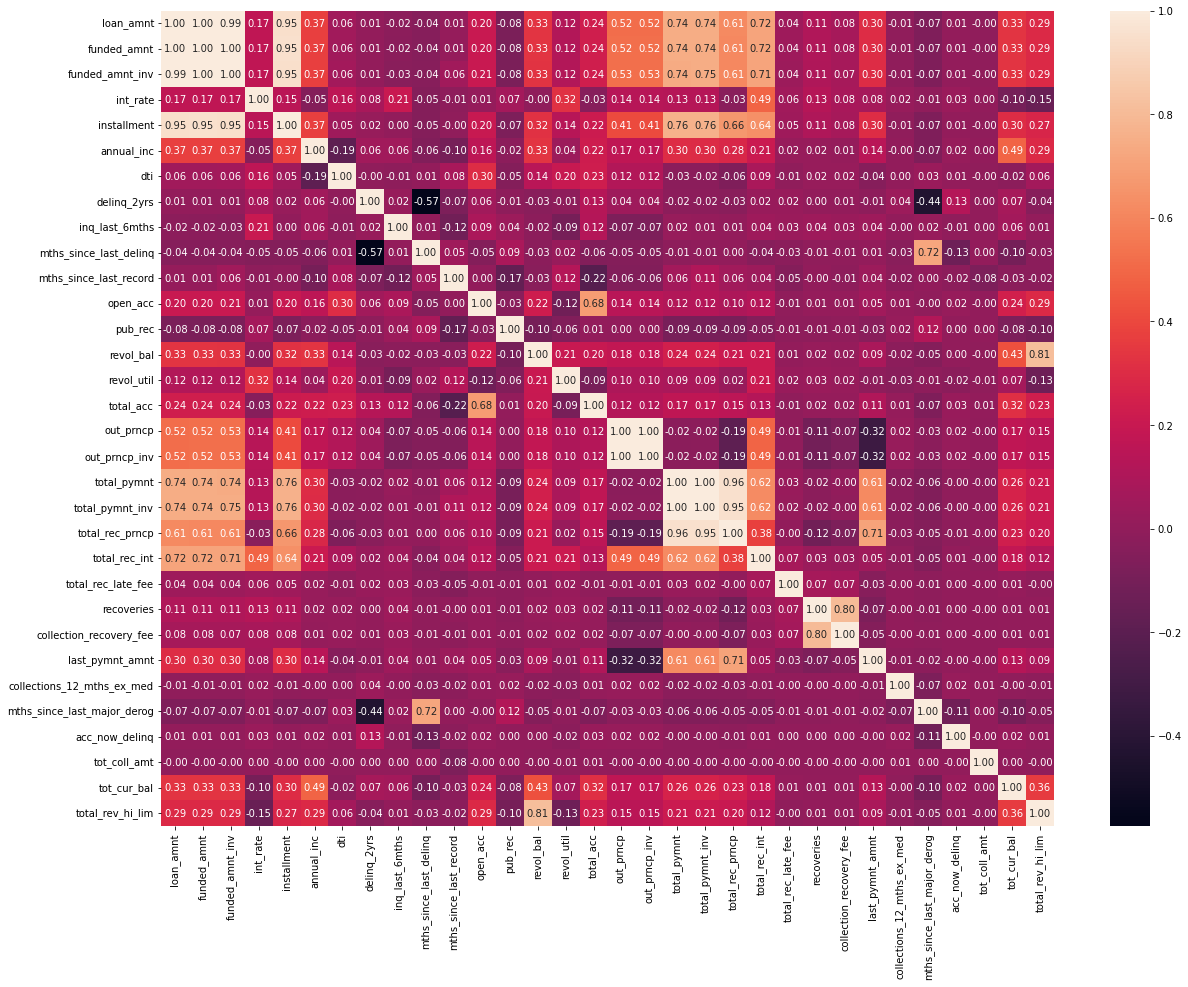

In [15]:
# correlation heatmap

plt.figure(figsize = (20,15))
sns.heatmap(df[numerical].corr(), annot = True, fmt = '.2f')
plt.show()

Many fields have a high correlation with other fields, drop them

# Preprocessing

In [16]:
df_prep = df.copy()

## Useless Features

In [17]:
# drop useless features
df_prep = df_prep.drop(columns = full_na + identifier + ['desc', 'url', 'title', 'zip_code', 'addr_state', 
                                                         'emp_title', 'sub_grade', 'pymnt_plan', 'application_type',
                                                         'policy_code'])

In [18]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 45 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    466285 non-null  int64  
 1   funded_amnt                  466285 non-null  int64  
 2   funded_amnt_inv              466285 non-null  float64
 3   term                         466285 non-null  object 
 4   int_rate                     466285 non-null  float64
 5   installment                  466285 non-null  float64
 6   grade                        466285 non-null  object 
 7   emp_length                   445277 non-null  object 
 8   home_ownership               466285 non-null  object 
 9   annual_inc                   466281 non-null  float64
 10  verification_status          466285 non-null  object 
 11  issue_d                      466285 non-null  object 
 12  loan_status                  466285 non-null  object 
 13 

## Feature Extraction

### Define Target Values

In [19]:
# Check target values
df_prep['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [20]:
# Categorize target values into bad loan and good loan
bad_loan = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off',
            'Late (31-120 days)']

df_prep['loan_status'] = df_prep['loan_status'].apply(lambda x : 1 if x in bad_loan else 0)

df_prep['loan_status'].unique()

array([0, 1])

#### Insight Based on Loan Status

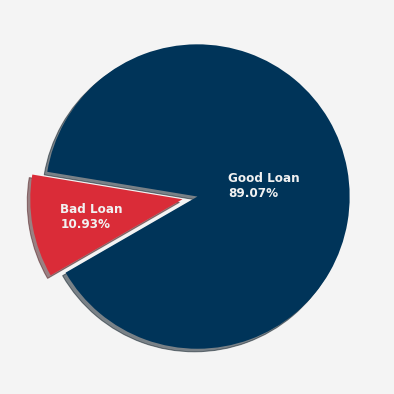

In [21]:
# Visualize target proportion

fig, ax = plt.subplots(figsize = (7,7))
ax.pie(df_prep['loan_status'].value_counts(), startangle = -150,
       explode = [0, .1], shadow = True, colors = ['#003459', '#da2c38'])
fig.set(facecolor = '#f4f4f4')

text1 = 'Good Loan\n89.07%'
text2 = 'Bad Loan\n10.93%'

plt.text(.2, 0, s = text1,
         fontsize = 12, weight = 600,
         color = '#f1f1f1')

plt.text(-0.9, -0.2, s = text2,
         fontsize = 12, weight = 600,
         color = '#f1f1f1')

ax.set(frame_on = False)
plt.show()

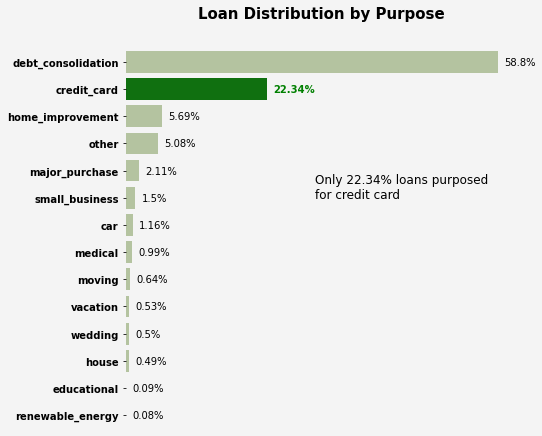

In [22]:
## Distribution of Customers by Purpose

df_purpose_cnt = pd.DataFrame(df_prep.value_counts('purpose'))
df_purpose_cnt = df_purpose_cnt.reset_index()
df_purpose_cnt = df_purpose_cnt.rename(columns = {0 : 'count'})
df_purpose_cnt['count_pct'] = df_purpose_cnt['count']*100/len(df_prep)

df_purpose_good = df_prep.groupby('purpose').agg({'loan_status' : 'mean'})
df_purpose_good = df_purpose_good.reset_index()
df_purpose_good = df_purpose_good.rename(columns = {'loan_status' : 'good_loan_pct'})
df_purpose_good['good_loan_pct'] = 100 - (df_purpose_good['good_loan_pct'] * 100)
df_purpose_good = df_purpose_good.sort_values('good_loan_pct', ascending = False)
df_purpose_good = df_purpose_good.reset_index(drop = True)

fig, ax = plt.subplots(figsize = (7,7))
clrs = ['green' if y == 'credit_card' else '#b5c99a' for y in df_purpose_cnt['purpose']]
sns.barplot(data = df_purpose_cnt, y='purpose', x = 'count_pct', orient = 'h', palette = clrs)

## Title
plt.title('Loan Distribution by Purpose', fontsize = 15,
          weight = 700, pad = 30)

## Frame and background
ax.set(frame_on = False)
fig.set(facecolor = '#f4f4f4')

## Label and ticks
ax.set_xticks([])
plt.xlabel('')
plt.ylabel('')

plt.yticks(weight = 600)

## Text and annotation
annot = np.round(df_purpose_cnt['count_pct'], 2)

for i in range(len(annot)):
  if i == 1:
    plt.text(annot[i] + 1, i, s = str(annot[i]) + '%',
            verticalalignment = 'center',
            horizontalalignment = 'left',
             color = 'green', weight = 600)
  else:
    plt.text(annot[i] + 1, i, s = str(annot[i]) + '%',
            verticalalignment = 'center',
            horizontalalignment = 'left')
    
text1 = 'Only 22.34% loans purposed\nfor credit card'
plt.text(30, 5, s = text1,
         fontsize = 12)

plt.show()

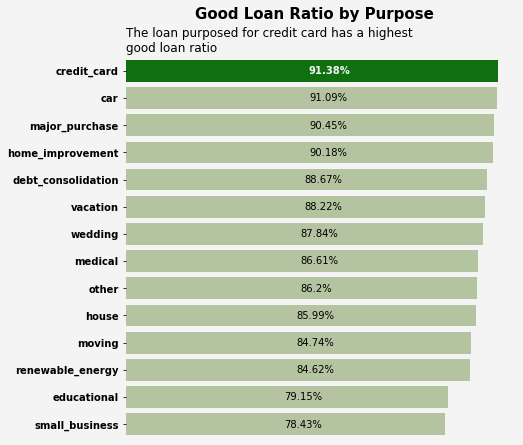

In [23]:
## Good loan ratio by Purpose

fig, ax = plt.subplots(figsize = (7,7))
clrs = ['green' if y == 'credit_card' else '#b5c99a' for y in df_purpose_good['purpose']]
sns.barplot(data = df_purpose_good, y='purpose', x = 'good_loan_pct', orient = 'h', palette = clrs)

## Title
plt.suptitle('Good Loan Ratio by Purpose', fontsize = 15,
          weight = 700)

plt.title('The loan purposed for credit card has a highest\ngood loan ratio',
          loc = 'left')

## Frame and background
ax.set(frame_on = False)
fig.set(facecolor = '#f4f4f4')

## Label and ticks
ax.set_xticks([])
plt.xlabel('')
plt.ylabel('')

plt.yticks(weight = 600)

## Text and annotation
annot = np.round(df_purpose_good['good_loan_pct'], 2)

for i in range(len(annot)):
  if i == 0:
    plt.text(int(annot[i]/2), i, s = str(annot[i]) + '%',
            verticalalignment = 'center',
            horizontalalignment = 'left',
             color = '#f4f4f4', weight = 600)
  else:
    plt.text(int(annot[i]/2), i, s = str(annot[i]) + '%',
            verticalalignment = 'center',
            horizontalalignment = 'left')
    
# text1 = 'Only 22.34% loans purposed\nfor credit card'
# plt.text(30, 5, s = text1,
#          fontsize = 12)

plt.show()

### Term

In [24]:
# Check term values
df_prep['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [25]:
# Take just the number values for 'term'
df_prep['term'] = df_prep['term'].apply(lambda x: int(x.split(' ')[1]))

df_prep['term'].unique()

array([36, 60])

### emp_length

In [26]:
df_prep['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [27]:
# Extract the numbe values for emp_length

def emp_len_extract(x):
  if str(x) == 'nan':
    return x
  elif str(x) == '< 1 year':
    return int(0)
  elif str(x) == '10+ years':
    return int(10)
  else:
    return int(x.split(' ')[0])

df_prep['emp_length'] = df_prep['emp_length'].apply(lambda x: emp_len_extract(x))

In [28]:
df_prep['emp_length'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

### earliest_cr_line

In [29]:
df_prep['earliest_cr_line'].head()

0    Jan-85
1    Apr-99
2    Nov-01
3    Feb-96
4    Jan-96
Name: earliest_cr_line, dtype: object

We will use 12-12-2017 as latest date recorded

In [30]:
## Convert to datetime
df_prep['earliest_cr_line'] = pd.to_datetime(df_prep['earliest_cr_line'], format = '%b-%y')
df_prep['earliest_cr_line'].head()

0   1985-01-01
1   1999-04-01
2   2001-11-01
3   1996-02-01
4   1996-01-01
Name: earliest_cr_line, dtype: datetime64[ns]

In [31]:
# Check min and max date

print('Min: ', df_prep['earliest_cr_line'].min())
print('Max: ', df_prep['earliest_cr_line'].max())

Min:  1969-01-01 00:00:00
Max:  2068-12-01 00:00:00


Year 1968 recognized as 2068, we need to fix it

In [32]:
## Fix error years
df_prep['earliest_cr_line'] = df_prep['earliest_cr_line'].apply(lambda x: x if x.year <= 2017 else x.replace(year = x.year-100))
df_prep['earliest_cr_line'].max()

Timestamp('2011-11-01 00:00:00')

next step is extract a feature mths_since_earliest_cr_line

In [33]:
df_prep['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - df_prep['earliest_cr_line'])/np.timedelta64(1, 'M')))
df_prep['mths_since_earliest_cr_line'].sample(5)

51322     101.0
341867    291.0
428445    403.0
323636    184.0
304479    265.0
Name: mths_since_earliest_cr_line, dtype: float64

In [34]:
# drop feature earliest_cr_line
df_prep = df_prep.drop(columns = 'earliest_cr_line')

### issue_d

In [35]:
df_prep['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
4    Dec-11
Name: issue_d, dtype: object

In [36]:
# Convert to datetime
df_prep['issue_d'] = pd.to_datetime(df_prep['issue_d'], format = '%b-%y')
df_prep['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [37]:
# check min and max date
print('Min: ', df_prep['issue_d'].min())
print('Max: ', df_prep['issue_d'].max())

Min:  2007-06-01 00:00:00
Max:  2014-12-01 00:00:00


In [38]:
# extract new feature mths_since_issue_d
df_prep['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - df_prep['issue_d'])/np.timedelta64(1, 'M')))
df_prep['mths_since_issue_d'].sample(5)

449780    46.0
238497    36.0
245630    37.0
117175    53.0
130608    54.0
Name: mths_since_issue_d, dtype: float64

In [39]:
# drop feature issue_d
df_prep = df_prep.drop(columns = 'issue_d')

### last_credit_pull_d

In [40]:
df_prep['last_credit_pull_d'].head()

0    Jan-16
1    Sep-13
2    Jan-16
3    Jan-15
4    Jan-16
Name: last_credit_pull_d, dtype: object

In [41]:
# Convert to datetime
df_prep['last_credit_pull_d'] = pd.to_datetime(df_prep['last_credit_pull_d'], format = '%b-%y')
df_prep['last_credit_pull_d'].head()

0   2016-01-01
1   2013-09-01
2   2016-01-01
3   2015-01-01
4   2016-01-01
Name: last_credit_pull_d, dtype: datetime64[ns]

In [42]:
# check min and max date
print('Min: ', df_prep['last_credit_pull_d'].min())
print('Max: ', df_prep['last_credit_pull_d'].max())

Min:  2007-05-01 00:00:00
Max:  2016-01-01 00:00:00


In [43]:
# extract new feature mths_since_issue_d
df_prep['mths_last_credit_pull_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - df_prep['last_credit_pull_d'])/np.timedelta64(1, 'M')))
df_prep['mths_last_credit_pull_d'].sample(5)

68236     23.0
435935    23.0
192740    23.0
154666    29.0
136131    23.0
Name: mths_last_credit_pull_d, dtype: float64

In [44]:
#drop feature last_credit_pull_d
df_prep = df_prep.drop(columns = 'last_credit_pull_d')

### last_pymnt_d

In [45]:
df_prep['last_pymnt_d'].head()

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    Jan-16
Name: last_pymnt_d, dtype: object

In [46]:
# Convert to datetime
df_prep['last_pymnt_d'] = pd.to_datetime(df_prep['last_pymnt_d'], format = '%b-%y')
df_prep['last_pymnt_d'].head()

0   2015-01-01
1   2013-04-01
2   2014-06-01
3   2015-01-01
4   2016-01-01
Name: last_pymnt_d, dtype: datetime64[ns]

In [47]:
# check min and max date
print('Min: ', df_prep['last_pymnt_d'].min())
print('Max: ', df_prep['last_pymnt_d'].max())

Min:  2007-12-01 00:00:00
Max:  2016-01-01 00:00:00


In [48]:
# extract new feature mths_since_last_pymnt_d
df_prep['mths_since_last_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - df_prep['last_pymnt_d'])/np.timedelta64(1, 'M')))
df_prep['mths_since_last_pymnt_d'].sample(5)

459149    24.0
327683    23.0
93767     23.0
429646    24.0
36224     82.0
Name: mths_since_last_pymnt_d, dtype: float64

In [49]:
# drop feature last_pymnt_d
df_prep = df_prep.drop(columns = 'last_pymnt_d')

### next_pymnt_d

In [50]:
df_prep['next_pymnt_d'].head()

0       NaN
1       NaN
2       NaN
3       NaN
4    Feb-16
Name: next_pymnt_d, dtype: object

In [51]:
# Convert to datetime
df_prep['next_pymnt_d'] = pd.to_datetime(df_prep['next_pymnt_d'], format = '%b-%y')
df_prep['next_pymnt_d'].head()

0          NaT
1          NaT
2          NaT
3          NaT
4   2016-02-01
Name: next_pymnt_d, dtype: datetime64[ns]

In [52]:
# check min and max date
print('Min: ', df_prep['next_pymnt_d'].min())
print('Max: ', df_prep['next_pymnt_d'].max())

Min:  2007-12-01 00:00:00
Max:  2016-03-01 00:00:00


In [53]:
# extract new feature mths_since_next_pymnt_d
df_prep['mths_since_next_pymnt_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-12') - df_prep['next_pymnt_d'])/np.timedelta64(1, 'M')))
df_prep['mths_since_next_pymnt_d'].sample(5)

274923     NaN
132756     NaN
121619     NaN
230731    23.0
220483     NaN
Name: mths_since_next_pymnt_d, dtype: float64

In [54]:
# drop feature next_pymnt_d
df_prep = df_prep.drop(columns = 'next_pymnt_d')

## Handle Missing Values

In [55]:
# Recheck Missing Values

feats_with_missing = [x for x in df_prep.columns if df_prep[x].isnull().sum() > 0]

for i in feats_with_missing:
  missing_pct = np.round(df_prep[i].isnull().sum()*100/len(df_prep),4)

  print(f'{i} : {missing_pct}% Missing Values')

emp_length : 4.5054% Missing Values
annual_inc : 0.0009% Missing Values
delinq_2yrs : 0.0062% Missing Values
inq_last_6mths : 0.0062% Missing Values
mths_since_last_delinq : 53.6906% Missing Values
mths_since_last_record : 86.5666% Missing Values
open_acc : 0.0062% Missing Values
pub_rec : 0.0062% Missing Values
revol_util : 0.0729% Missing Values
total_acc : 0.0062% Missing Values
collections_12_mths_ex_med : 0.0311% Missing Values
mths_since_last_major_derog : 78.7739% Missing Values
acc_now_delinq : 0.0062% Missing Values
tot_coll_amt : 15.0715% Missing Values
tot_cur_bal : 15.0715% Missing Values
total_rev_hi_lim : 15.0715% Missing Values
mths_since_earliest_cr_line : 0.0062% Missing Values
mths_last_credit_pull_d : 0.009% Missing Values
mths_since_last_pymnt_d : 0.0806% Missing Values
mths_since_next_pymnt_d : 48.7286% Missing Values


In [56]:
# drop features with more than 40% missing values
many_missing = [x for x in df_prep.columns if (df_prep[x].isnull().sum()/len(df_prep)) > 0.4]
df_prep = df_prep.drop(columns = many_missing)

In [57]:
# Fill missing values with median, mode, or 0
df_prep['emp_length'].fillna(df_prep['emp_length'].median(), inplace = True)
df_prep['annual_inc'].fillna(df_prep['annual_inc'].median(), inplace = True)
df_prep['delinq_2yrs'].fillna(0, inplace = True)
df_prep['inq_last_6mths'].fillna(0, inplace = True)
df_prep['open_acc'].fillna(0, inplace = True)
df_prep['pub_rec'].fillna(0, inplace = True)
df_prep['revol_util'].fillna(0, inplace = True)
df_prep['total_acc'].fillna(0, inplace = True)
df_prep['collections_12_mths_ex_med'].fillna(0, inplace = True)
df_prep['acc_now_delinq'].fillna(0, inplace = True)
df_prep['tot_coll_amt'].fillna(0, inplace = True)
df_prep['tot_coll_amt'].fillna(0, inplace = True)
df_prep['tot_cur_bal'].fillna(0, inplace = True)
df_prep['total_rev_hi_lim'].fillna(0, inplace = True)
df_prep['mths_since_earliest_cr_line'].fillna(0, inplace = True)
df_prep['mths_last_credit_pull_d'].fillna(0, inplace = True)
df_prep['mths_since_last_pymnt_d'].fillna(0, inplace = True)

In [58]:
# Check missing
df_prep.isnull().sum().sum()

0

## Feature Encoding

In [59]:
categorical = [x for x in df_prep.columns if df_prep[x].dtypes == 'O']
categorical

['grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status']

In [60]:
def woe_encoder(data, feat, target):
    encoding_dict = {}
    
    total_events = cat_events = data[data[target] == 1]
    total_non_events = cat_events = data[data[target] == 0]
    
    for i in data[feat].unique():
        df_category = data[data[feat] == i]
        cat_events = df_category[df_category[target] == 1]
        cat_non_events = df_category[df_category[target] == 0]
        
        num_events = len(cat_events)
        num_non_events = len(cat_non_events)
        
        if (num_events != 0) & (num_non_events != 0):
            woe = np.log(num_events/len(total_events)) - np.log(num_non_events/len(total_non_events))
        else:
            woe = 0
        encoding_dict.update({i : woe})
    print(feat)
    print(encoding_dict)
    print('=============')
        
    data[feat] = data[feat].map(encoding_dict)

In [61]:
# Encoding
df_woe = df_prep.copy()
for i in categorical:
  woe_encoder(df_woe, i, 'loan_status')

grade
{'B': -0.364043491078754, 'C': 0.055250531721923624, 'A': -1.114729547483376, 'E': 0.6784658191115103, 'F': 0.952213514005023, 'D': 0.3950007109750664, 'G': 1.1441658353033484}
home_ownership
{'RENT': 0.16198009675581482, 'OWN': -0.010763732508749957, 'MORTGAGE': -0.1448324913371568, 'OTHER': 0.7656169593995088, 'NONE': 0.4396160226455912, 'ANY': 0}
verification_status
{'Verified': 0.17341984342257333, 'Source Verified': -0.05443767695986912, 'Not Verified': -0.16697225908826963}
purpose
{'credit_card': -0.2627724752362883, 'car': -0.22653910133104116, 'small_business': 0.8071904418169171, 'other': 0.2657644438572735, 'wedding': 0.12084336312377975, 'debt_consolidation': 0.040474809273493395, 'home_improvement': -0.1199397010733314, 'major_purchase': -0.14991025778428835, 'medical': 0.230547562009904, 'moving': 0.3837899305440464, 'vacation': 0.08453506743101524, 'house': 0.283798141406189, 'renewable_energy': 0.3930960070106986, 'educational': 0.7640399207506299}
initial_list_st

In [62]:
df_woe[categorical].sample(5)

,grade,home_ownership,verification_status,purpose,initial_list_status
328697,0.395001,0.161980,-0.054438,0.040475,0.108330
414688,0.055251,0.161980,-0.054438,-0.262772,-0.229417
162836,0.678466,-0.144832,0.173420,0.040475,0.108330
160341,-0.364043,-0.144832,-0.166972,-0.262772,-0.229417
456139,0.395001,-0.144832,0.173420,0.040475,0.108330


## Feature Selection

### Informational Value Checking

In [63]:
def generate_iv(data, feat, target, sel_feats):
    total_events = cat_events = data[data[target] == 1]
    total_non_events = cat_events = data[data[target] == 0]
    
    iv = 0
    
    for i in data[feat].unique():
        df_category = data[data[feat] == i]
        cat_events = df_category[df_category[target] == 1]
        cat_non_events = df_category[df_category[target] == 0]
        
        num_events = len(cat_events)
        num_non_events = len(cat_non_events)
        
        if (num_events != 0) & (num_non_events != 0):
            woe = np.log(num_events/len(total_events)) - np.log(num_non_events/len(total_non_events))
        else:
            woe = 0
        
        iv += woe * ((num_events/len(total_events)) - (num_non_events/len(total_non_events)))
        
    if iv >= 0.1:
        sel_feats.append(feat)
        
    print(f'{feat} : {np.round(iv,8)}')

In [64]:
selected_feats = []
for i in tqdm(df_woe.columns.to_list()):
  generate_iv(df_woe, i, 'loan_status', selected_feats)

  0%|          | 0/41 [00:00<?, ?it/s]

loan_amnt : 0.09195789
funded_amnt : 0.09306907
funded_amnt_inv : 0.09440201
term : 0.03885983
int_rate : 0.45411415
installment : 0.71079345
grade : 0.29078214
emp_length : 0.00654573
home_ownership : 0.02166191
annual_inc : 0.1233651
verification_status : 0.0208314
loan_status : 0.0
purpose : 0.03698019
dti : 0.11046693
delinq_2yrs : 0.00044443
inq_last_6mths : 0.05188745
open_acc : 0.00231605
pub_rec : 0.00098847
revol_bal : 0.42704896
revol_util : 0.05483738
total_acc : 0.00926776
initial_list_status : 0.02480132
out_prncp : 0.30032247
out_prncp_inv : 0.29718919
total_pymnt : 0.23552798
total_pymnt_inv : 0.27556286
total_rec_prncp : 0.43112525
total_rec_int : 0.78732525
total_rec_late_fee : 0.0880108
recoveries : 0.31099685
collection_recovery_fee : 0.27661153
last_pymnt_amnt : 0.97710761
collections_12_mths_ex_med : 0.00031803
acc_now_delinq : 5.216e-05
tot_coll_amt : 0.03044021
tot_cur_bal : 0.69149573
total_rev_hi_lim : 0.09039657
mths_since_earliest_cr_line : 0.02929712
mths_si

In [65]:
selected_feats

['int_rate',
 'installment',
 'grade',
 'annual_inc',
 'dti',
 'revol_bal',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_amnt',
 'tot_cur_bal',
 'mths_since_issue_d',
 'mths_last_credit_pull_d',
 'mths_since_last_pymnt_d']

In [66]:
df_sel = df_woe.copy()
df_sel = df_sel[selected_feats + ['loan_status']]

### Correlation Checking

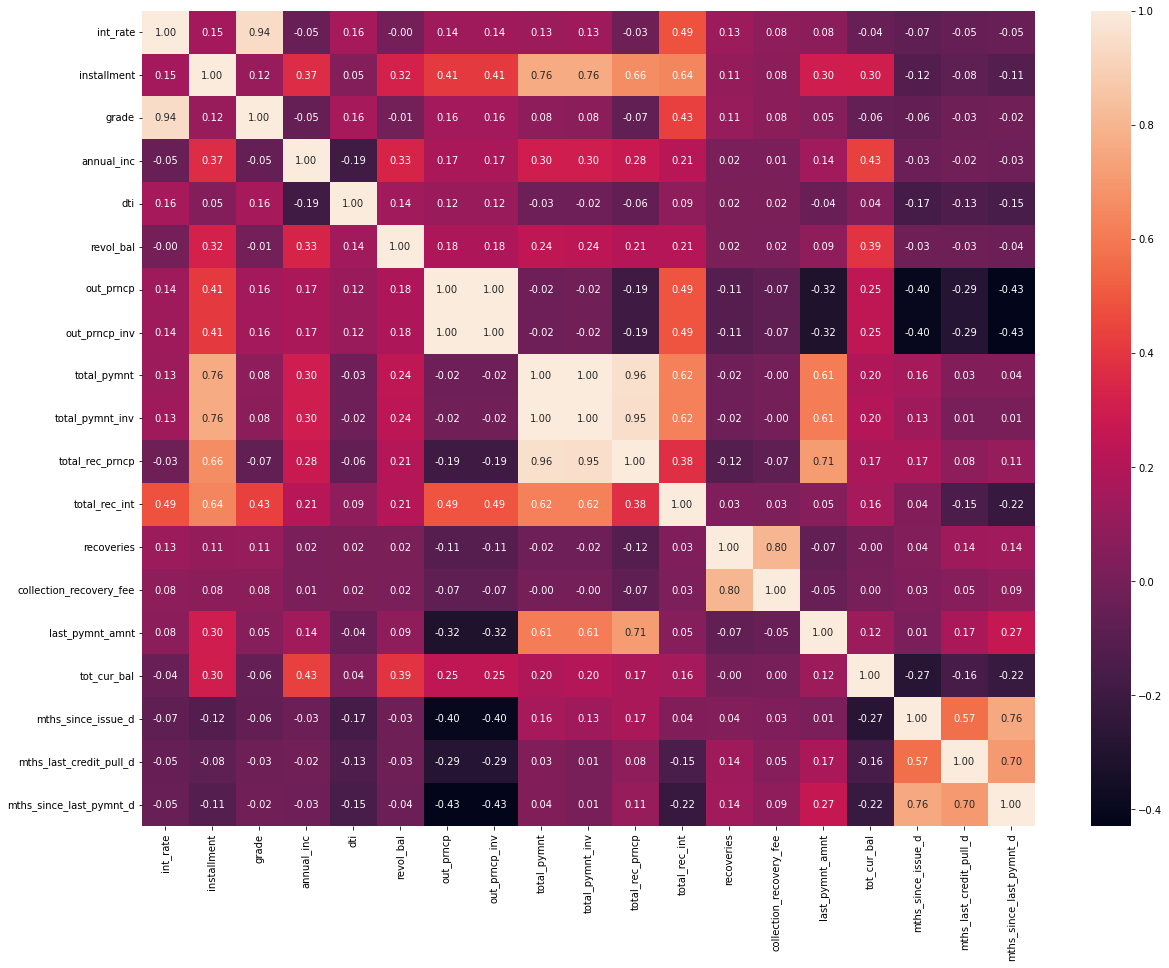

In [67]:
plt.figure(figsize = (20, 15))
sns.heatmap(df_sel[selected_feats].corr(), annot = True, fmt = '.2f')
plt.show()

We will drop high correlated fetures respects to informational value

In [68]:
# drop high correlated features with lower information value

feat_drop = ['grade', 'total_pymnt', 'total_pymnt_inv', 'out_prncp_inv', 
             'total_rec_prncp', 'collection_recovery_fee', 'mths_since_issue_d']
df_sel = df_sel.drop(columns = feat_drop)

## Feature Transformation

In [69]:
# split into train and test set
from sklearn.model_selection import train_test_split
X = df_sel.drop(columns = 'loan_status')
y = df_sel['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1)
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)
feats = X_train.columns.to_list()

In [70]:
# Yeo Johnson Transformation
from sklearn.preprocessing import PowerTransformer

feat_to_transform = [x for x in feats if x not in categorical]

pt = PowerTransformer()
pt.fit(X_train[feat_to_transform])

X_train_trans = pt.transform(X_train[feat_to_transform])
X_test_trans = pt.transform(X_test[feat_to_transform])

X_train_trans = pd.DataFrame(X_train_trans, columns = feat_to_transform)
X_test_trans = pd.DataFrame(X_test_trans, columns = feat_to_transform)

X_train = X_train.drop(columns = feat_to_transform)
X_train = pd.concat([X_train_trans, X_train], axis = 1)

X_test = X_test.drop(columns = feat_to_transform)
X_test = pd.concat([X_test_trans, X_test], axis = 1)

In [71]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns = feats)
X_test = pd.DataFrame(X_test, columns = feats)

## Imbalance Handling

In [72]:
y_train.value_counts(normalize = True)

0    0.89092
1    0.10908
Name: loan_status, dtype: float64

In [73]:
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE(sampling_strategy=.5).fit_resample(X_train, y_train)

X_train = X_resample
y_train = y_resample

# Modeling

## Functions

In [74]:
## Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(model, train_feats, test_feats, pos_label = 1, cv = True):
  y_pred_train = model.predict(train_feats)
  y_pred_train_proba = model.predict_proba(train_feats)

  y_pred_test = model.predict(test_feats)
  y_pred_test_proba = model.predict_proba(test_feats)

  print('Accuracy Train: ', np.round(accuracy_score(y_train, y_pred_train),2))
  print('Accuracy Test: ', np.round(accuracy_score(y_test, y_pred_test),2))
  print('=========================')
  print('Precision Train: ', np.round(precision_score(y_train, y_pred_train, pos_label = pos_label),2))
  print('Precision Test: ', np.round(precision_score(y_test, y_pred_test, pos_label = pos_label),2))
  print('=========================')
  print('Recall Train: ', np.round(recall_score(y_train, y_pred_train, pos_label = pos_label),2))
  print('Recall Test: ', np.round(recall_score(y_test, y_pred_test, pos_label = pos_label),2))
  print('=========================')
  print('f1 Train: ', np.round(f1_score(y_train, y_pred_train, pos_label = pos_label),2))
  print('f1 Test: ', np.round(f1_score(y_test, y_pred_test, pos_label = pos_label),2))
  print('=========================')
  print('AUC Train: ', np.round(roc_auc_score(y_train, y_pred_train_proba[:, 1]),2))
  print('AUC Test: ', np.round(roc_auc_score(y_test, y_pred_test_proba[:, 1]),2))

# Draw Confusion Matrix
def draw_cm(model, feats, target, test = True):
  y_pred = model.predict(feats)
  cm = confusion_matrix(target, y_pred)

  group_counts = ["{0:0.0f}".format(value) for value in 
                  cm.flatten()]
  group_percentages = ["{0:.2%}".format(value) for value in 
                       cm.flatten()/np.sum(cm)]

  annots = [f'{v1}\n \n{v2}' for v1, v2 in 
            zip(group_counts,group_percentages)]
  annots = np.asarray(annots).reshape(2,2)
  
  labels = ['Good Loan', 'Bad Loan']

  sns.heatmap(cm, annot = annots, fmt = '', cbar = False,
              yticklabels = labels, xticklabels = labels,
              cmap = 'Greens_r')
  
  plt.ylabel('Actual')
  plt.xlabel('Predicted')

  plt.show()

## Logistic Regression

### Base Training

In [75]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 500)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [76]:
# Evaluate
evaluate_model(lr, X_train, X_test)

Accuracy Train:  0.91
Accuracy Test:  0.95
Precision Train:  0.93
Precision Test:  0.78
Recall Train:  0.8
Recall Test:  0.8
f1 Train:  0.86
f1 Test:  0.79
AUC Train:  0.95
AUC Test:  0.95


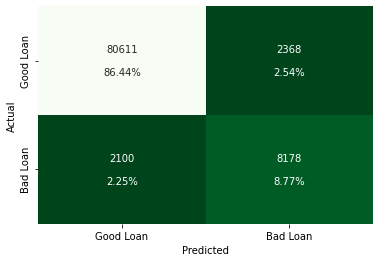

In [77]:
# Confusion Matrix (Test)
draw_cm(lr, X_test, y_test)

In [78]:
coefs = lr.coef_.tolist()[0]

df_imp = pd.DataFrame()
df_imp['Feature'] = feats
df_imp['Coef'] = coefs
df_imp['Abs_Coef'] = abs(df_imp['Coef'])
df_imp = df_imp.sort_values('Abs_Coef', ascending = False).reset_index(drop = True)
df_imp

,Feature,Coef,Abs_Coef
0,mths_last_credit_pull_d,-53.576862,53.576862
1,mths_since_last_pymnt_d,16.953800,16.953800
2,last_pymnt_amnt,-15.990916,15.990916
3,recoveries,11.453672,11.453672
4,installment,9.307071,9.307071
5,annual_inc,-5.908379,5.908379
6,total_rec_int,-5.203667,5.203667
7,tot_cur_bal,4.098669,4.098669
8,int_rate,3.729391,3.729391
9,revol_bal,-2.104325,2.104325


## Decision Tree

In [79]:
## Model training
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [80]:
## Evaluate
evaluate_model(dt, X_train, X_test)

Accuracy Train:  1.0
Accuracy Test:  0.98
Precision Train:  1.0
Precision Test:  0.9
Recall Train:  1.0
Recall Test:  0.93
f1 Train:  1.0
f1 Test:  0.92
AUC Train:  1.0
AUC Test:  0.96


In [81]:
## Hyperparameter Tuning
dt_tune = DecisionTreeClassifier(max_depth = 8)
dt_tune.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [82]:
## Evaluate
evaluate_model(dt_tune, X_train, X_test)

Accuracy Train:  0.98
Accuracy Test:  0.97
Precision Train:  0.95
Precision Test:  0.83
Recall Train:  0.97
Recall Test:  0.95
f1 Train:  0.96
f1 Test:  0.89
AUC Train:  0.99
AUC Test:  0.99


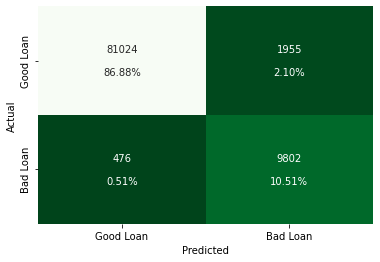

In [84]:
## Confusion Matrix (test set)
draw_cm(dt_tune, X_test, y_test)

## Final Model

I choose the model with higher AUC score, which is Decision Tree Classifier

In [85]:
## Shap Values
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 11.3 MB/s eta 0:00:00


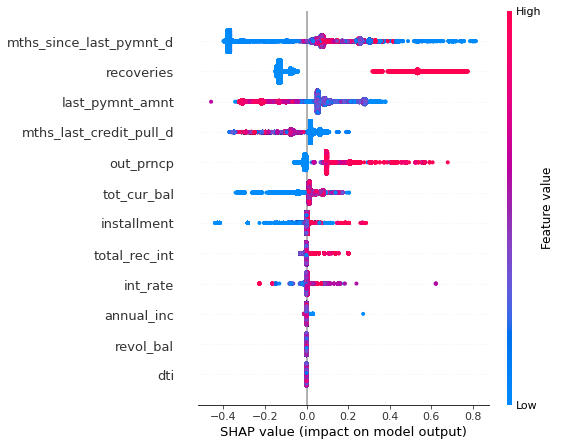

In [88]:
import shap
explainer = shap.TreeExplainer(dt_tune)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[1], X_train)

Be cautious of borrowers with:
1. a long last payment date
2. a high recoveries amount
3. a low amount of last total payment received
4. a more recent last credit pull date
5. a high remaining outstanding principal for the total amount funded

In [94]:
## Export model and transformers to pickle
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [95]:
import pickle

with open('/content/drive/MyDrive/IDX Partner/decisiontree.pkl', 'wb') as f:
  pickle.dump(dt_tune, f)

with open('/content/drive/MyDrive/IDX Partner/powertransformer.pkl', 'wb') as f:
  pickle.dump(pt, f)

with open('/content/drive/MyDrive/IDX Partner/scaler.pkl', 'wb') as f:
  pickle.dump(sc, f)